In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

In [2]:
# Read in the positions in the output file
def read_pos(dir, cbrtN):
    assert type(dir) == str
    file = open('../results/'+dir, 'r')
    lines = file.readlines()

    # create empty lists to store the x,y,z coordinates
    x_cpp = []
    y_cpp = []
    z_cpp = []
    
    for i in range(0, len(lines)):
        text = lines[i].split(' ')
                
        # read positions
        if text[0] == 'Positions:':
            text_pos = lines[i+3].split(' ')
            index = 0 
            for k in range(0, cbrtN): # number of layer
                for j in range(0, cbrtN*cbrtN): # for each layer
                    text_pos = lines[i+3+j+index].split(' ')
                    # print(text_pos)
                    x_cpp.append(float(text_pos[3]))
                    y_cpp.append(float(text_pos[4]))
                    z_cpp.append(float(text_pos[5].split('\n')[0]))
                index += 2+cbrtN*cbrtN
    return [x_cpp, y_cpp, z_cpp, cbrtN]

In [3]:
dir = 'equil_64_10000_2_2.txt'
cbrtN = 4;
[x_cpp, y_cpp, z_cpp, cbrtN] = read_pos(dir, cbrtN)
# print(x_cpp)
# print(y_cpp)
# print(z_cpp)

In [4]:
# find the interior points' positions in x_cpp, y_cpp and z_cpp

# create empty lists to store interior points' positions
x_interior = []
y_interior = []
z_interior = []

# find the interior points' positions
for k in range(1,cbrtN-1): # each layer
    for j in range(1,cbrtN-1): # each row
        for i in (k*cbrtN**2+j*cbrtN+1, k*cbrtN**2+j*cbrtN+cbrtN-2):
            x_interior.append(x_cpp[i])
            y_interior.append(y_cpp[i])
            z_interior.append(z_cpp[i])
            
# print(x_interior)
# print(y_interior)
# print(z_interior)

[0.86612583, 1.5329811, 0.86612583, 1.5329811, 0.86612583, 1.5329811, 0.86612583, 1.5329811]
[0.65303824, 0.65113856, 1.3469618, 1.3488614, 0.65303824, 0.65113856, 1.3469618, 1.3488614]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [5]:
def drawSphere(xCenter, yCenter, zCenter, r = 0.05, color = 'k'):
    #draw sphere with arbitrary coordinates
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x=np.cos(u)*np.sin(v)
    y=np.sin(u)*np.sin(v)
    z=np.cos(v)
    # move sphere and scale size by inputted coordinates - I would suggest thinking of a way to correlate mass to radius for 
    # your particles!
    x = r*x + xCenter
    y = r*y + yCenter
    z = r*z + zCenter
    return (x,y,z,color)

<IPython.core.display.Javascript object>


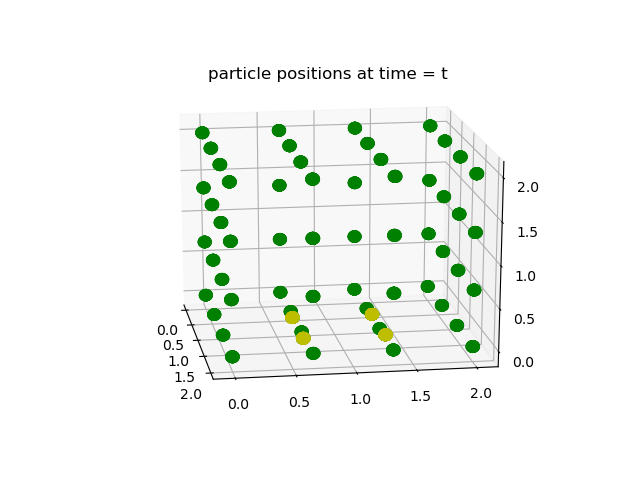

In [6]:
# this will allow you to rotate your plot by clicking and dragging 
%matplotlib notebook 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# draw a sphere for each data point
for i in range(0, len(x_cpp)):
    (xs,ys,zs,c) = drawSphere(x_cpp[i],y_cpp[i],z_cpp[i], 0.03, 'g')
    ax.scatter(xs, ys, zs, color=c)

for i in range(0, len(x_interior)):
    (xs,ys,zs,c) = drawSphere(x_interior[i],y_interior[i],z_interior[i], 0.03, 'y')
    ax.scatter(xs, ys, zs, color=c)
    
plt.title("particle positions at time = t")
plt.show()